<h1>March Madness: Enrollment Mania</h1>

By: Timothy Becker, Fall 2021

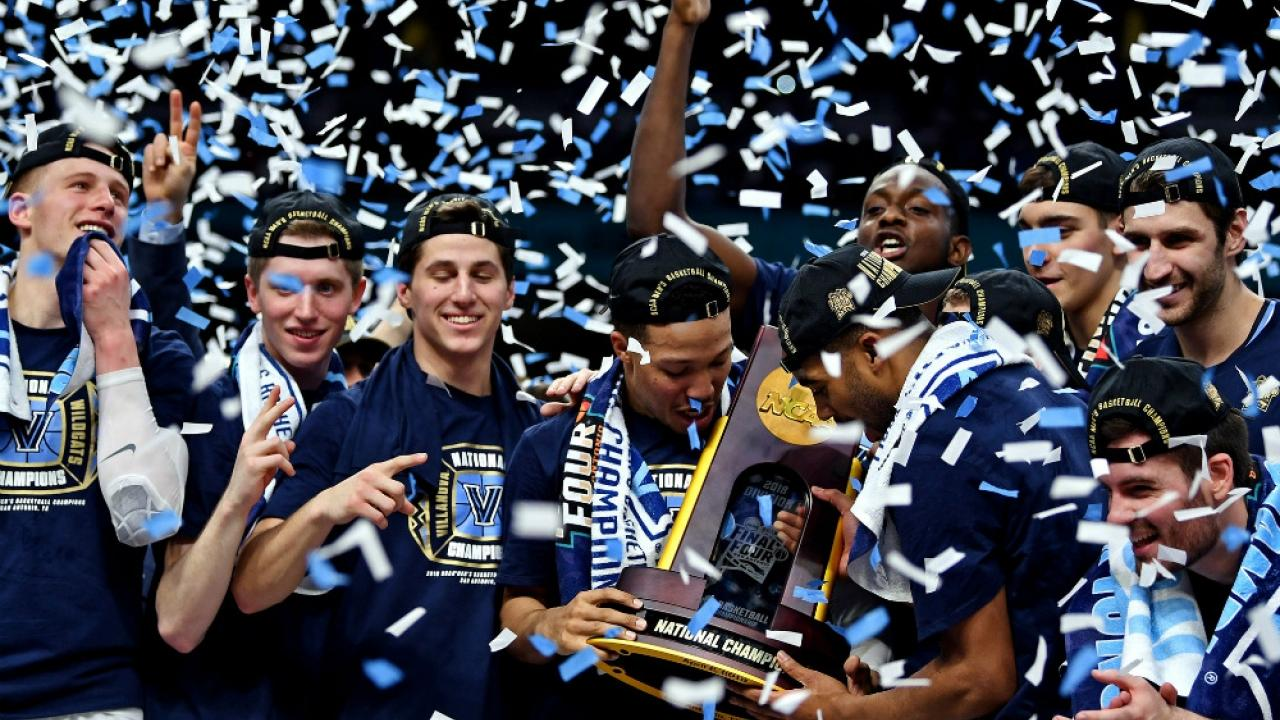

<h1>Introduction</h1>

<h3>Background</h3>

Every March (Except for 2020) a collection of the 64 best college basketball teams compete in one of the highlighted sports events of the entire year. They appropiately nicknamed it March Madness Mania, as the buzz around the games and teams is unmatched in the sports world. The championship game in 2021 between Baylor and Gonazaga had approxamitely 17 million viewers resulting in large profits for both universities. But the bottom line of these talented basketball universities is not the only thing impacted by winning the presitgious March Madness tournament. Prospective students are naturally drawn to schools who have winning programs. This tutorial will walk you through insights powered by data analysis and visualization to determine whether universities notice an enrollment spike after winning a national championship in men's basketball.

<h3>Associated Readings:</h3>

The below articles are extremely insightful into how large and small universities enrollment is benefiting from a "cinderella" run in the NCAA March Madness tournament.

<strong>Topical Readings:</strong>

Forbes: 
<a href="https://www.forbes.com/sites/cartercoudriet/2018/04/03/how-hoops-success-helps-colleges-get-applicants/?sh=f09d9f813544">Hoops Success Helps Colleges Get Applicants</a>

Washington State University:
<a href="https://facsen.wsu.edu/documents/2020/12/the-cinderella-effect-12-10-2020.pdf/">Cinderella Effect on University Advertising</a>

The Atlantic: <a href="https://www.theatlantic.com/education/archive/2017/03/the-march-madness-application-bump/519846/">Cinderella Effect on University Advertising</a>

<strong>Python Data Visualization Readings:</strong>

Seaborn Library: <a href="https://seaborn.pydata.org/tutorial.html">Seaborn User Guide</a>

Pandas Datframes: <a href="https://realpython.com/pandas-dataframe/">The Pandas DataFrame: Make Working With Data Delightful</a>

<h3>Imported Libraries</h3>

The below libraries were utilized throughout this tutorial for data collection, cleaning, and visualization in order to effectively illlustrate the connection between the March Madness tournament and university enrollment. 
<ol>
    <li>Numpy - Multi-dimensional arrays and matrices</li>
    <li>Pandas - Data analysis and manipulation tool</li>
    <li>Seaborn - Python data visualization library</li>
    <li>Folium - Binding of data to a map</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.map import *

<h1>1. Data Collection</h1>

The immediate first step in the data lifecycle is to collect the data from a reliable source. I utilized two different resources in the form of csv files, the first csv file was collected from the National Center for Education Statistics. The information contained in the csv file included all of the institutions in the major conferences Atlantic Coast Conference, Big East, Big Ten, Big 12, Pacific-12, and Southeastern Conference along with the enrollment count for the fall semester for the years of 2011-2020. 

In [2]:
# Gather the data from the csv file, store it into pandas dataframe and display the first 5 entries
pd.set_option('display.max_rows', 80)
enrollment_table = pd.read_csv("DataFiles/Summary_Tables.csv")
enrollment_table.head()

,Unit Id,Institution Name,Fall 2020,Fall 2019,Fall 2018,Fall 2017,Fall 2016,Fall 2015,Fall 2014,Fall 2013,Fall 2012,Fall 2011
0,100751,The University of Alabama,"37,840","38,100","38,390","38,563","37,663","37,098","36,047","34,752","33,503","31,647"
1,100858,Auburn University,"30,737","30,460","30,440","29,776","28,290","27,287","25,912","24,864","25,134","25,469"
2,104151,Arizona State University Campus Immersion,"74,795","53,286","51,585","51,164","51,869","51,984","50,320","48,702","73,378","72,254"
3,104179,University of Arizona,"45,601","44,577","44,097","43,751","43,161","42,595","42,236","40,621","40,223","39,236"
4,106397,University of Arkansas,"27,562","27,559","27,778","27,558","27,194","26,754","26,237","25,341","24,537","23,199"


The second csv file I obtained for this final tutorial was obtained from data.world and was named the Big Dance and contained data on every March Madness game played between 1985-2019 in all rounds of the tournament. The suppourting information included the year, round, region number, region name, the seed, score, and team name for each participating team in the game.  

In [3]:
#Repeat the same process above but with the different data set
basketball_table = pd.read_csv("DataFiles/Big_Dance_CSV.csv")
basketball_table.head()

,Year,Round,Region Number,Region Name,Seed,Score,Team,Team.1,Score.1,Seed.1
0,1985,1,1,West,1,83,St Johns,Southern,59,16
1,1985,1,1,West,2,81,VCU,Marshall,65,15
2,1985,1,1,West,3,65,NC State,Nevada,56,14
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13
4,1985,1,1,West,5,58,Washington,Kentucky,65,12


<h1>2. Data Processing</h1>

The second step in the data lifecycle is data processing and both tables needed to be altered to effectively engage in data visualization. Before I detail the changes made to the pandas dataframe, I will begin by describing the data being represented in the enrollment table. This dataframe contains:
1) Unit ID (unique value associated with university/college) <br>
2) Institution Name <br>
3) Fall Enrollment (2011-2020) <br>

Moving on to the alterations made to the Pandas dataframe. The university enrollment table needed to have its orignal column names altered to remove spaces and the below changes were made:
1) Institution Name -> Institution <br>
2) Fall 2020 -> Fall_2020 (This change made to all years)


In [25]:
#Alter the orignal data frame to update column names for later analysis
enrollment_table = enrollment_table.rename(columns = {'Institution Name': 'Institution'})
enrollment_table = enrollment_table.rename(columns = {'Fall 2020': 'Fall_2020', 'Fall 2019': 'Fall_2019', 'Fall 2018': 'Fall_2018', 'Fall 2017': 'Fall_2017', 'Fall 2016': 'Fall_2016', 'Fall 2015': 'Fall_2015', 'Fall 2014': 'Fall_2014', 'Fall 2013': 'Fall_2013', 'Fall 2012': 'Fall_2012', 'Fall 2011': 'Fall_2011'})
enrollment_table.head(20)

,Unit Id,Institution,Fall_2020,Fall_2019,Fall_2018,Fall_2017,Fall_2016,Fall_2015,Fall_2014,Fall_2013,Fall_2012,Fall_2011
0,100751,The University of Alabama,"37,840","38,100","38,390","38,563","37,663","37,098","36,047","34,752","33,503","31,647"
1,100858,Auburn University,"30,737","30,460","30,440","29,776","28,290","27,287","25,912","24,864","25,134","25,469"
2,104151,Arizona State University Campus Immersion,"74,795","53,286","51,585","51,164","51,869","51,984","50,320","48,702","73,378","72,254"
3,104179,University of Arizona,"45,601","44,577","44,097","43,751","43,161","42,595","42,236","40,621","40,223","39,236"
4,106397,University of Arkansas,"27,562","27,559","27,778","27,558","27,194","26,754","26,237","25,341","24,537","23,199"
5,110635,University of California-Berkeley,"42,327","43,185","42,501","41,891","40,154","38,189","37,565","36,198","35,893","36,137"
6,110662,University of California-Los Angeles,"44,589","44,371","44,537","44,027","43,548","41,908","41,845","40,795","39,945","39,271"
7,123961,University of Southern California,"46,287","48,321","47,310","45,687","43,871","43,401","42,453","41,368","39,958","38,010"
8,126614,University of Colorado Boulder,"37,437","37,883","36,681","35,338","33,977","33,056","32,432","32,017","31,945","32,558"
9,129020,University of Connecticut,"27,215","27,280","27,412","27,578","27,721","27,043","26,541","25,911","25,483","25,868"


Before I detail the changes made to the Pandas dataframe I will begin by describing the data being represented in the college basketball table. This dataframe contains:

1) Year  <br>
2) Round (The round the game was played in the tournament, rounds range between 1-6) <br>
3) Region Number (1 = East, 2=West, 3=South, 4=Midwest) <br>
4) Region Name <br>
5) Seed (Seeds range from 1-16, seeds are assigned prior to tournamnet, 1 is best and 16 is worst) <br>
6) Score (Team #1 number of points) <br>
7) Team (University/College #1) <br>
8) Team.1 (University/College #1) <br>
9) Score.1 (Team #2 number of points) <br>
10) Seed.1 (Seeds range from 1-16, seeds are assigned prior to tournamnet, 1 is best and 16 is worst) <br>

Moving on to the alterations made to the pandas dataframe. The university enrollment table needed to have its orignal column names altered to remove spaces and the below changes were made:
1) Region Name -> Region_Name <br>
2) Team.1 -> Team_2 <br>
3) Score.1 -> Score_2 <br>
4) Seed.1 -> Seed_2 

In [26]:
#Repeat the same process above with the other data set
pd.set_option('display.max_rows', 2210)
basketball_table = basketball_table.rename(columns = {'Region Name': 'Region_Name','Team.1': 'Team_2', 'Score.1': 'Score_2', 'Seed.1': 'Seed_2'})
basketball_table.head(20)

,Year,Round,Region Number,Region_Name,Seed,Score,Team,Team_2,Score_2,Seed_2
0,1985,1,1,West,1,83,St Johns,Southern,59,16
1,1985,1,1,West,2,81,VCU,Marshall,65,15
2,1985,1,1,West,3,65,NC State,Nevada,56,14
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13
4,1985,1,1,West,5,58,Washington,Kentucky,65,12
5,1985,1,1,West,6,75,Tulsa,UTEP,79,11
6,1985,1,1,West,7,50,Alabama,Arizona,41,10
7,1985,1,1,West,8,54,Iowa,Arkansas,63,9
8,1985,1,2,East,1,68,Georgetown,Lehigh,43,16
9,1985,1,2,East,2,65,Georgia Tech,Mercer,58,15


<h1> 3. Data Visualization </h1>

The third step of the data lifecycle is exploratory analysis and data visualization and we will begin by exploring enrollment trends of the 6 major conferences which includes the Atlantic Coast Conference, Big East, Big Ten, Big 12, Pacific-12, and Southeastern Conference. I randomly selected one representative school from each conference to gain a solid understanding on the general enrollment trend from 2011-2020 regardles of basketball perfomance in the March Madness tournament. The schools I selected from each conference are listed below:

Atlantic Coast Conference: Boston College <br> 
Big East: Seton Hall <br> 
Big Ten: Michigan <br> 
Big Twelve: West Virginia <br> 
Pacific-12: UCLA <br> 
Southeastern Conference: Kentucky <br> 

<AxesSubplot:title={'center':'Boston College Enrollment'}, xlabel='Years', ylabel='Students Enrolled'>

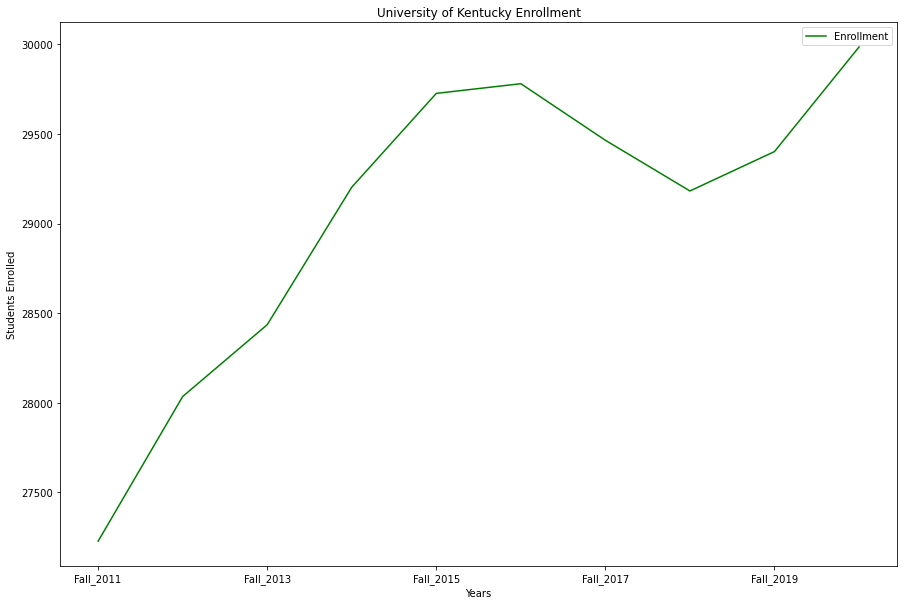

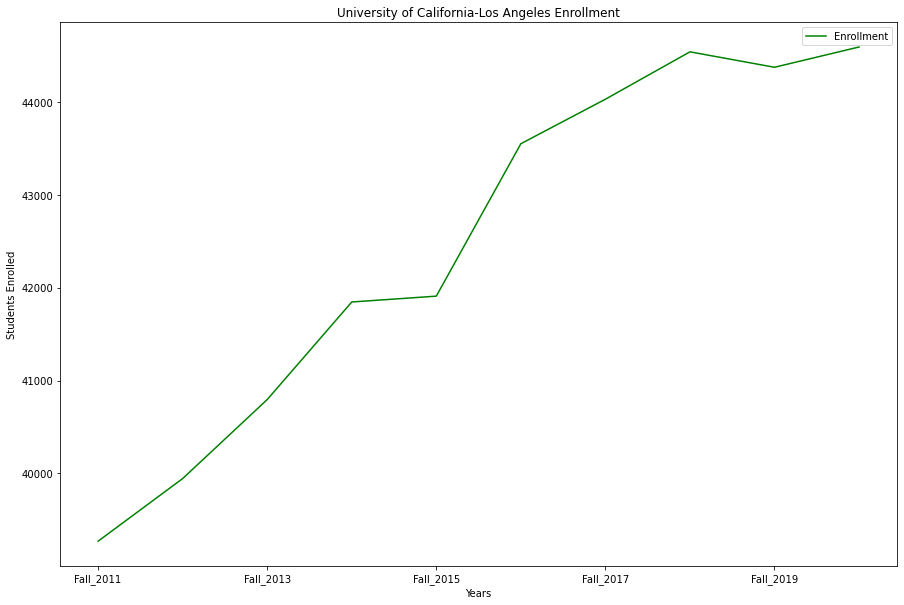

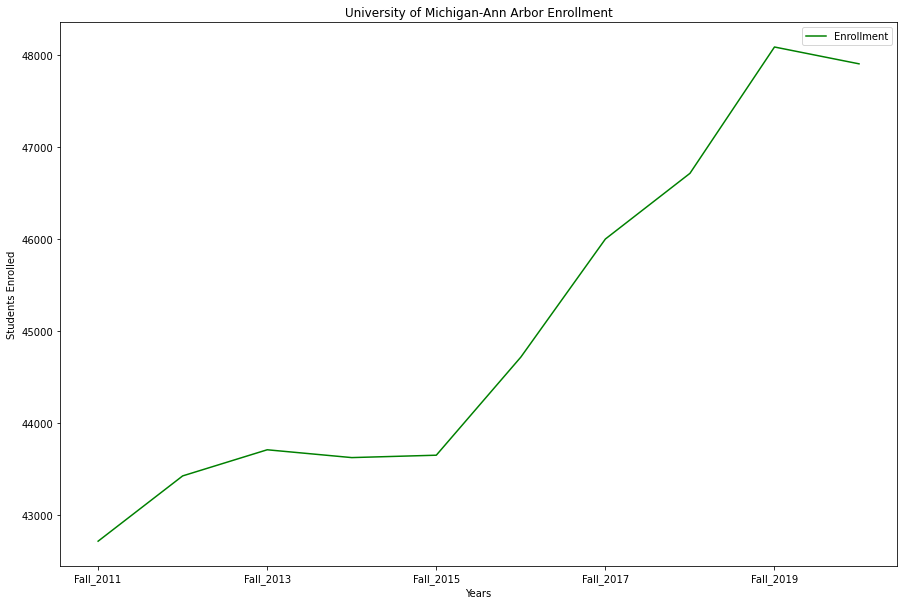

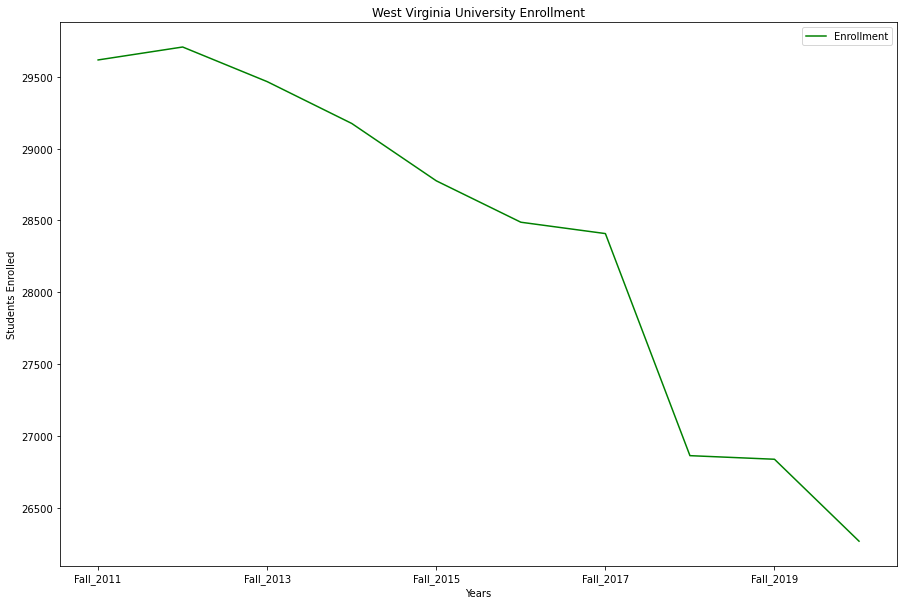

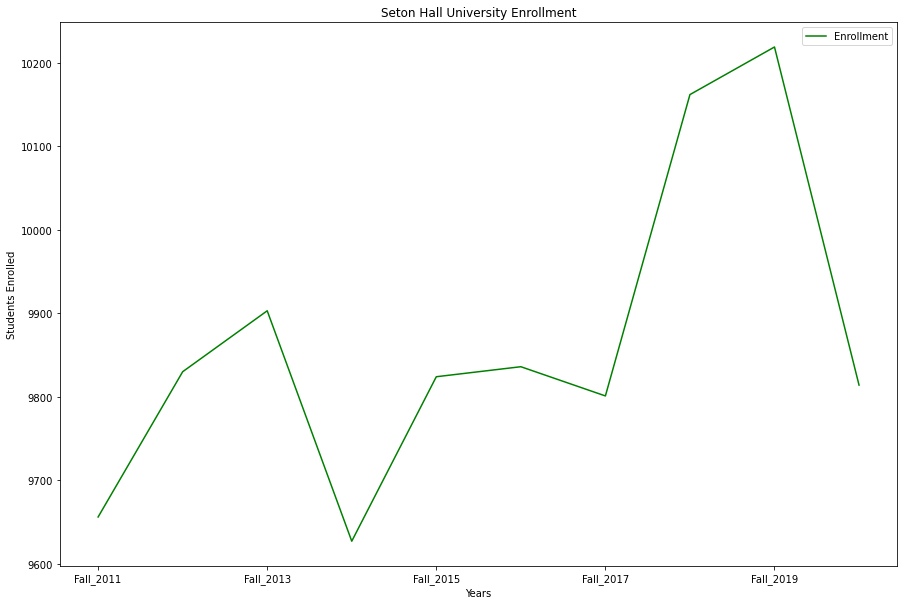

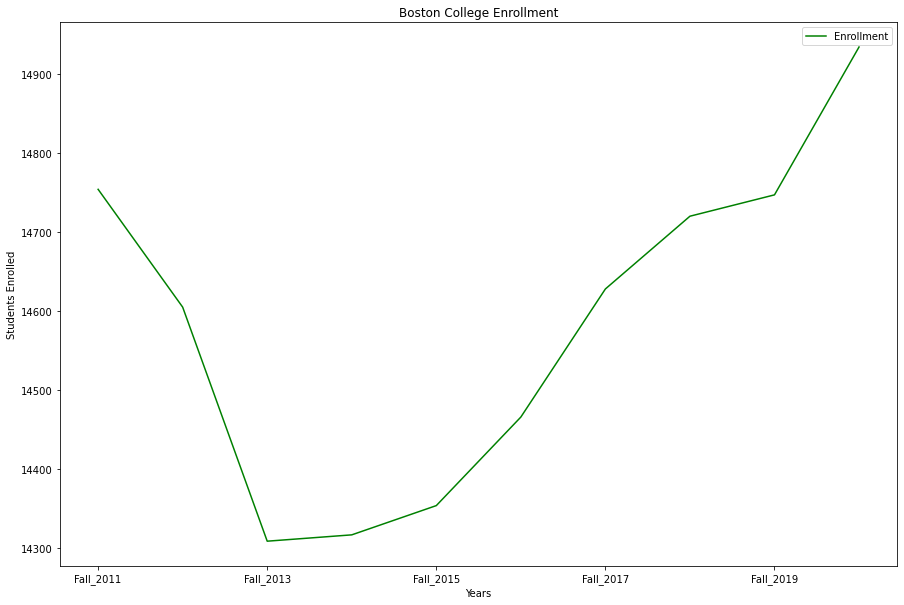

In [6]:
#Retrieve the 6 rows associated with the 6 selected universities - 1 from each major conference
kentucky = enrollment_table.query('Institution == "University of Kentucky"')
ucla = enrollment_table.query('Institution == "University of California-Los Angeles"')
michigan = enrollment_table.query('Institution == "University of Michigan-Ann Arbor"')
west_virginia = enrollment_table.query('Institution == "West Virginia University"')
seton_hall = enrollment_table.query('Institution == "Seton Hall University"')
boston_college = enrollment_table.query('Institution == "Boston College"')

#Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
kentucky = kentucky.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
kentucky.columns.values[0] = "Years"
kentucky.columns.values[1] = "Enrollment"
kentucky['Enrollment'] = kentucky['Enrollment'].str.replace(',', '').astype(int)
kentucky.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="University of Kentucky Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

##Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
ucla = ucla.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
ucla.columns.values[0] = "Years"
ucla.columns.values[1] = "Enrollment"
ucla['Enrollment'] = ucla['Enrollment'].str.replace(',', '').astype(int)
ucla.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="University of California-Los Angeles Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

#Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
michigan = michigan.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
michigan.columns.values[0] = "Years"
michigan.columns.values[1] = "Enrollment"
michigan['Enrollment'] = michigan['Enrollment'].str.replace(',', '').astype(int)
michigan.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="University of Michigan-Ann Arbor Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

#Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
west_virginia = west_virginia.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
west_virginia.columns.values[0] = "Years"
west_virginia.columns.values[1] = "Enrollment"
west_virginia['Enrollment'] = west_virginia['Enrollment'].str.replace(',', '').astype(int)
west_virginia.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="West Virginia University Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

#Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
seton_hall = seton_hall.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
seton_hall.columns.values[0] = "Years"
seton_hall.columns.values[1] = "Enrollment"
seton_hall['Enrollment'] = seton_hall['Enrollment'].str.replace(',', '').astype(int)
seton_hall.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="Seton Hall University Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

#Drop UnitID and Insitution columns and then alter enrollment number to be able to graph 
boston_college = boston_college.T.drop(["Unit Id", "Institution"]).reset_index().iloc[::-1]
boston_college.columns.values[0] = "Years"
boston_college.columns.values[1] = "Enrollment"
boston_college['Enrollment'] = boston_college['Enrollment'].str.replace(',', '').astype(int)
boston_college.plot.line(x="Years", y="Enrollment", rot=0, color = "Green", title="Boston College Enrollment", xlabel="Years", ylabel="Students Enrolled", figsize=(15, 10))

The above graphs illustrate the enrollment trends from the years 2011-2020 for the selected universities. All the universities except for West Virginia University had a positive trend of enrollment indicating that each Fall on average the univerity would recieve more Fall applications from prospective students then the year before. Next, we will focus our attention to the March Madness tournament and gather information on the winning teams of the tournament, the scoring in the tournament, and the location of the winning universities. 

<AxesSubplot:title={'center':'NCAA Basketball Champions By Seed'}, xlabel='Seed', ylabel='# Seed Winners'>

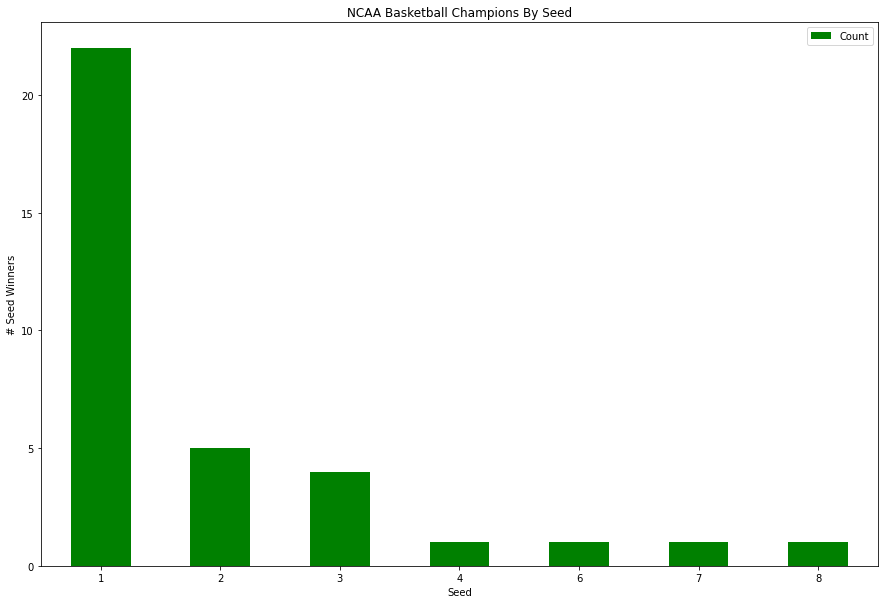

In [7]:
# Gather only the teams that played in the championship
total_champs = basketball_table.query('Region_Name == "Championship"')

# For the next couple visualizations we only need seed, score, team name for both teams
total_champs = total_champs.filter(items=['Seed', 'Score', 'Team', 'Team_2', 'Score_2', 'Seed_2'])
team1_champions = total_champs[total_champs['Score'] > total_champs['Score_2']]
team1_champions = team1_champions.filter(items = ['Seed', 'Team'])
team2_champions = total_champs[total_champs['Score'] < total_champs['Score_2']]
team2_champions = team2_champions.filter(items = ['Seed_2', 'Team_2'])
team2_champions = team2_champions.rename(columns = {'Seed_2': 'Seed', 'Team_2': 'Team'})

# Calculate the value counts of champions by seed 
seed_champs = pd.concat([team1_champions, team2_champions])
seed_count = seed_champs['Seed'].value_counts().rename_axis('Seed').reset_index(name='Count')
seed_count = seed_count.sort_values(by=['Seed'])
seed_count

#Plot the graph 
seed_count.plot.bar(x='Seed', y='Count', rot=0, color = "Green", title="NCAA Basketball Champions By Seed", xlabel="Seed", ylabel="# Seed Winners", figsize=(15, 10))

The above bar graph represents the seed of each March Madness champion from 1985 to 2019 and it is clearly evident that the lower seed a team is (Ex 1-3) the higher chance they have to win the tournamnet. This graph also illustrates that it is not always a guarantee that a higher seed (Ex 6-8) cannot win the tournament, but it is very unlikely. The last conclusion that can be made from this graph is that a team with a seed in the range of 9-16 has never won the tournament in the years 1985-2019. 

<AxesSubplot:title={'center':'NCAA Basketball Final Four Appearances'}, xlabel='College', ylabel='Number of Final Four Appearances'>

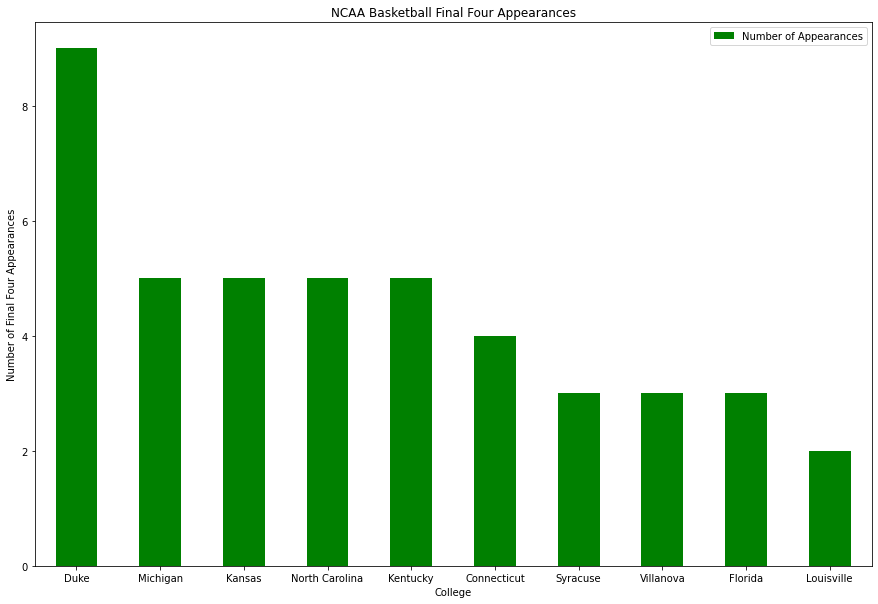

In [8]:
# Gather only the teams that played in the Final Four
final_four = basketball_table.query('Region_Name == "Final Four"')

teamff1_champions = final_four[final_four.Score > final_four.Score_2]
teamff2_champions = final_four[final_four.Score < final_four.Score_2]
final_four1 = teamff1_champions.value_counts('Team')
final_four2 = teamff2_champions.value_counts('Team_2')

final_fourcount = pd.concat([teamff1_champions['Team'], teamff2_champions['Team_2']])

# Get the value counts for each team in final four - Only keep the top 10 teams by value
final_fourcount = final_fourcount.value_counts().rename_axis('Count').reset_index(name='Team')
final_fourcount.columns =['Team', 'Number of Appearances']
final_fourcount = final_fourcount.head(10)

# Plot the graph 
final_fourcount.plot.bar(x='Team', y='Number of Appearances', rot=0, color = "Green", title="NCAA Basketball Final Four Appearances", xlabel="College", ylabel="Number of Final Four Appearances", figsize=(15, 10))

The next insightful graph is a bar graph of the top 10 universities who have played the most Final Four (Semifinal of the March Madness) games from 1985-2019. Duke University outranks every school by a long shot followed by the University of North Carolina, University of Michigan, University of Kansas and the University of Kentucky. This visualization will be extremly helpful to gain an understanding of the best performing teams in the last couple of decades. 

In [9]:
# Select only the champions after 2011 - Display data frame
new_champions = basketball_table.query('Region_Name == "Championship"').query(' Year > 2011')
team1_champions = new_champions[new_champions.Score > new_champions.Score_2]
team2_champions = new_champions[new_champions.Score < new_champions.Score_2]

new_champions

,Year,Round,Region Number,Region_Name,Seed,Score,Team,Team_2,Score_2,Seed_2
1763,2012,6,1,Championship,1,67,Kentucky,Kansas,59,2
1826,2013,6,1,Championship,1,82,Louisville,Michigan,76,4
1889,2014,6,1,Championship,7,60,Connecticut,Kentucky,54,8
1952,2015,6,1,Championship,1,63,Wisconsin,Duke,68,1
2015,2016,6,1,Championship,2,77,Villanova,North Carolina,74,1
2078,2017,6,1,Championship,1,65,Gonzaga,North Carolina,71,1
2141,2018,6,1,Championship,3,62,Michigan,Villanova,79,1
2204,2019,6,1,Championship,3,77,Texas Tech,Virginia,85,1


The above data frame provides the associated information with the NCAA March Madness champions from the years 2012-2019 including the year, round, region number, region name, in addition to the seed, score, and team name for each team playing in the championship game. This data frame will be used in later visualizations to gain an understanding on the correlation between winning March Madness and the Fall enrollment the year after. 

In [24]:
# Create folium graph to visualize geographic location of past champions
map_osm = folium.Map(location=[39.8245, -97.6325], zoom_start=4)
school_locations = FeatureGroup(name='Universities')

# March madness champion latitude and longtitude hard coded into map
school_locations.add_child(folium.Marker(location=[38.0307, -84.5040],popup="University of Kentucky", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[38.2123, -85.7585],popup="University of Louisville", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[41.8077, -72.2540],popup="University of Connecticut", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[40.0369, -75.3426],popup="Villanova University", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[36.0014, -78.9382],popup="Duke University", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[35.9049, -79.0469],popup="University of North Carolina at Chapel Hill", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))
school_locations.add_child(folium.Marker(location=[38.0336, -78.5080],popup="University of Virginia-Main Campus", icon=folium.Icon(color='red', icon = 'university', prefix='fa')))

map_osm.add_child(school_locations)
map_osm

This folium marker map is a fun representation of the university location of the NCAA March Madness tournament champions and it is evident that they are all located on the eastern half of the United States. No west coast teams won the NCAA March Madness tournament from 2011-2019 which could be a representative of the quality of basketball programs throughout the country.

<AxesSubplot:title={'center':'NCAA Championship Total Score (2010-2019)'}, xlabel='Years', ylabel='Total Score'>

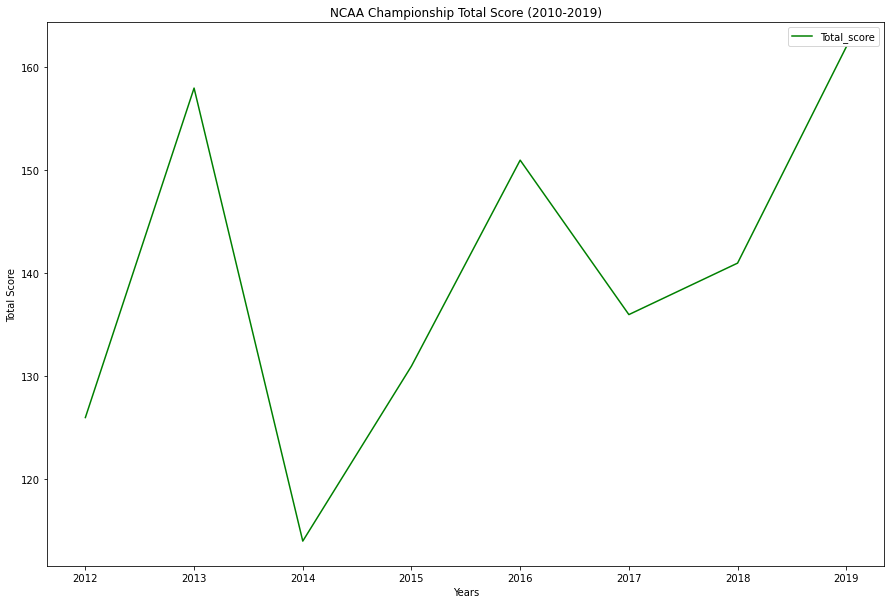

In [11]:
# Calculate the total score of the past championship games to analyze scoring trends
new_champions['Total_score'] = new_champions['Score'] + new_champions['Score_2']
new_champions.plot.line(x="Year", y="Total_score", rot=0, color = "Green", title="NCAA Championship Total Score (2010-2019)", xlabel="Years", ylabel="Total Score", figsize=(15, 10))

In order to gain more outside information on the championship games I created a a visualization of the total sum of points scored in the championship to determine if the trend of offense was positive over the last decade. Based on this graph the championship game total score has trended upwards indicating that teams are scoring more points then previous years either from a greater emphasis on shooting more 3 pointers or playing less defense. This graph would be insightful for individuals looking for a connection between the philosophy of recent basketball gameplans and the subsequent score of the game.

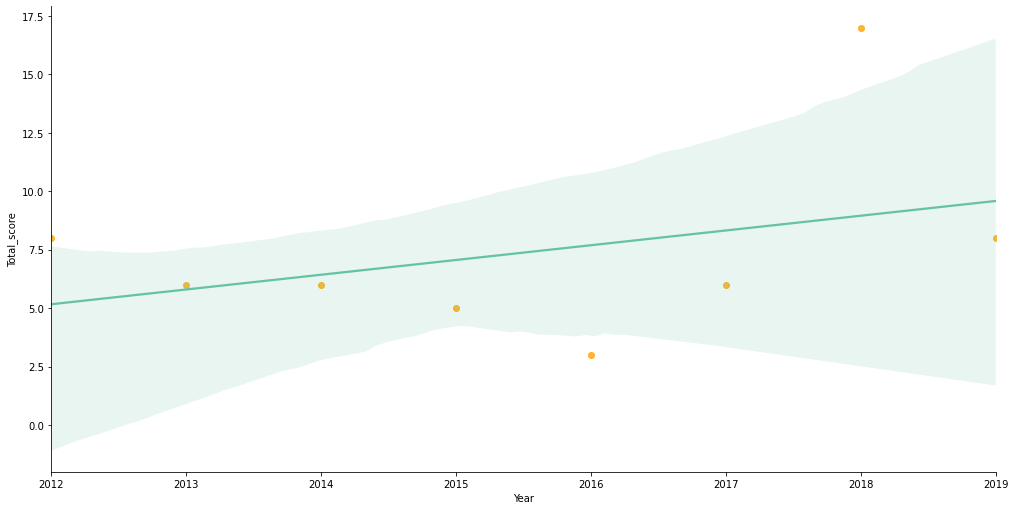

In [12]:
# Calculate difference in championship games to visualize if over the years teaming winning by wider margins
new_champions['Total_score'] = new_champions['Score'] - new_champions['Score_2']
new_champions['Total_score'] = new_champions['Total_score'].abs()
sns.set_palette("Set2")
sns.lmplot(x='Year',y='Total_score',data=new_champions,fit_reg=True, height=7, aspect=2, scatter_kws={'color':'orange'})

This scatter plot shows the difference of the championship game between the two final teams, so for example the 2019 championship game between Texas Tech and Virginia had a score of 77-85 resulting in a score difference of 8 points. The scatter plot, with regression line, illustrates that over the years 2012-2019 the team that won the championship game won by a larger margin as the years progressed. This could lead to a conclusion that the difference in the quality of teams is becoming more evident as years progress. 

In [13]:
# Count the number of occurences of each team to win championship 
champs_count1 = team1_champions.value_counts('Team')
champs_count2 = team2_champions.value_counts('Team_2')

championship_count = pd.concat([team1_champions['Team'], team2_champions['Team_2']])

# Display how many times a team won a championship between 2012-2019
championship_count = championship_count.value_counts().rename_axis('Count').reset_index(name='Team')
championship_count.columns =['Team', 'Number of Wins']
championship_count

,Team,Number of Wins
0,Villanova,2
1,Louisville,1
2,Virginia,1
3,Kentucky,1
4,Connecticut,1
5,North Carolina,1
6,Duke,1


This data frame isolates the championship winning teams and counts the number of championships they won over the years 2012-2019. Villanova University won the championship in 2016 and 2018 resulting in the count of 2 championships in the data frame. The other schools of Lousville, Kentucky, North Carolina, Virginia, Duke, and Conneticut only won the championship once. 

The bar graph belows just visually illustrates the data frame above. The bar graph lists all the universities that have won a championship and how many championships they won to show how successful certain college basketball programs have been since 2011.

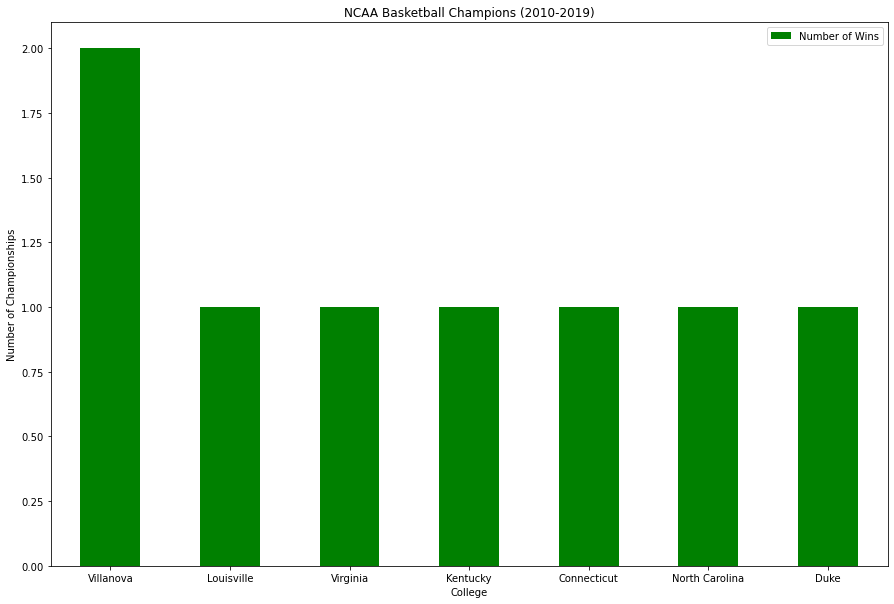

In [14]:
# Plot the above data frame
ax = championship_count.plot.bar(x='Team', y='Number of Wins', rot=0, color = "Green", title="NCAA Basketball Champions (2010-2019)", xlabel="College", ylabel="Number of Championships", figsize=(15, 10))


The below data frame reduces the previous chart to solely include the information related to the national championship and remove any seed, score, and team name from the losing team. This data frame will be crucial for the later analysis connecting the national championship team to data from the enrollment table and the impact of a national championship. 


In [15]:
# Modify the above data frames to only include the seed, score and team name of the winner
winner_1 = new_champions[new_champions.Score > new_champions.Score_2]
winner_1 = winner_1.drop(columns = ['Team_2', 'Score_2', 'Seed_2', 'Total_score'])
winner_2 = new_champions[new_champions.Score < new_champions.Score_2]
winner_2 = winner_2.drop(columns = ['Team', 'Score', 'Seed', 'Total_score']).rename(columns = {'Team_2': 'Team', 'Score_2': 'Score', 'Seed_2': 'Seed'})
winners = pd.concat([winner_1, winner_2])
winners

,Year,Round,Region Number,Region_Name,Seed,Score,Team
1763,2012,6,1,Championship,1,67,Kentucky
1826,2013,6,1,Championship,1,82,Louisville
1889,2014,6,1,Championship,7,60,Connecticut
2015,2016,6,1,Championship,2,77,Villanova
1952,2015,6,1,Championship,1,68,Duke
2078,2017,6,1,Championship,1,71,North Carolina
2141,2018,6,1,Championship,1,79,Villanova
2204,2019,6,1,Championship,1,85,Virginia


<h1> 4. Data Analysis </h1>

The last step in the data lifecycle that involves engaging with the data is data analysis in which we had previously created data visualizations to gain outside insights into the March Madness tournament and fall enrollment in general, however we will now look into the impact of national championships on fall enrollment. The first analysis will visualize the immediate next fall enrollment period after winning a national championship compared to the previous fall enrollment period. I have listed below the paired national champion with the year of the fall enrollment after its championship. 

<ol>
    <li>University of Kentucky -> 2013 </li>
    <li>University of Louisville -> 2014 </li>
    <li>University of Connecticut -> 2015 </li>
    <li>Villanova University -> 2016 </li>
    <li>Duke University -> 2017 </li>
    <li>University of North Carolina at Chapel Hill -> 2018 </li>
    <li>Villanova University -> 2019 </li>
    <li>University of Virginia-Main Campus -> 2020 </li>
</ol>

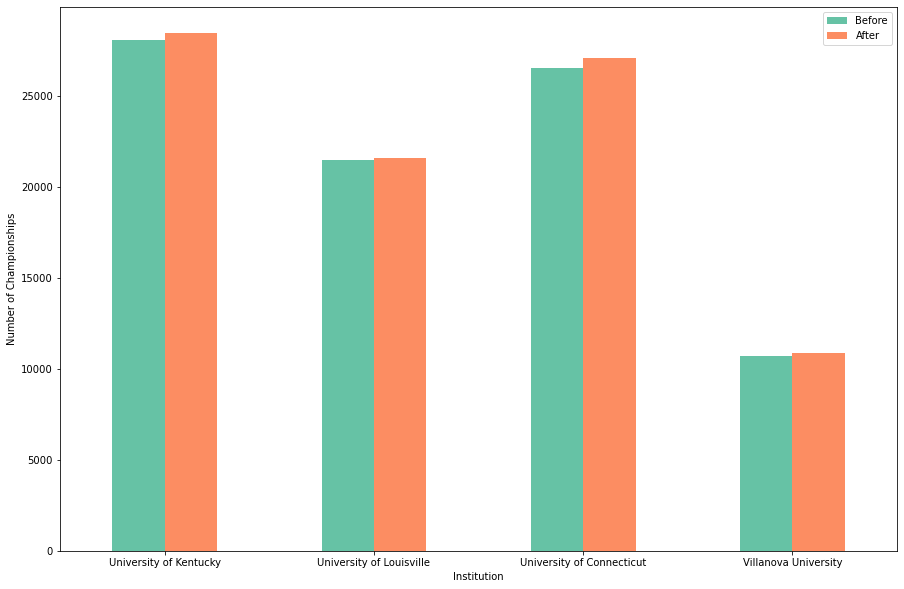

In [16]:
# Gather the enrollment the year before the team won the championship and the year after
kent = enrollment_table.query('Institution == "University of Kentucky"')
kent = kent[['Institution', 'Fall_2013', 'Fall_2012']].reset_index().drop(columns = 'index')
kent['Fall_2012'] = kent['Fall_2012'].str.replace(',', '').astype(int)
kent['Fall_2013'] = kent['Fall_2013'].str.replace(',', '').astype(int)
kent = kent.rename(columns = {'Fall_2013': 'After', 'Fall_2012': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
louis = enrollment_table.query('Institution == "University of Louisville"')
louis = louis[['Institution', 'Fall_2014', 'Fall_2013']].reset_index().drop(columns = 'index')
louis['Fall_2013'] = louis['Fall_2013'].str.replace(',', '').astype(int)
louis['Fall_2014'] = louis['Fall_2014'].str.replace(',', '').astype(int)
louis = louis.rename(columns = {'Fall_2014': 'After', 'Fall_2013': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
conn = enrollment_table.query('Institution == "University of Connecticut"')
conn = conn[['Institution', 'Fall_2015', 'Fall_2014']].reset_index().drop(columns = 'index')
conn['Fall_2014'] = conn['Fall_2014'].str.replace(',', '').astype(int)
conn['Fall_2015'] = conn['Fall_2015'].str.replace(',', '').astype(int)
conn = conn.rename(columns = {'Fall_2015': 'After', 'Fall_2014': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
vill_1 = enrollment_table.query('Institution == "Villanova University"')
vill_1 = vill_1[['Institution', 'Fall_2016', 'Fall_2015']].reset_index().drop(columns = 'index')
vill_1['Fall_2016'] = vill_1['Fall_2016'].str.replace(',', '').astype(int)
vill_1['Fall_2015'] = vill_1['Fall_2015'].str.replace(',', '').astype(int)
vill_1 = vill_1.rename(columns = {'Fall_2016': 'After', 'Fall_2015': 'Before'})

combine = pd.concat([kent, louis, conn, vill_1], ignore_index=True)

#Split into two graphs for easier visualization 
df = pd.DataFrame({'Before': combine['Before'].tolist(),
                   'After': combine['After'].tolist()}, index=combine['Institution'])
ax = df.plot.bar(rot=0, ylabel="Number of Championships", figsize=(15, 10))

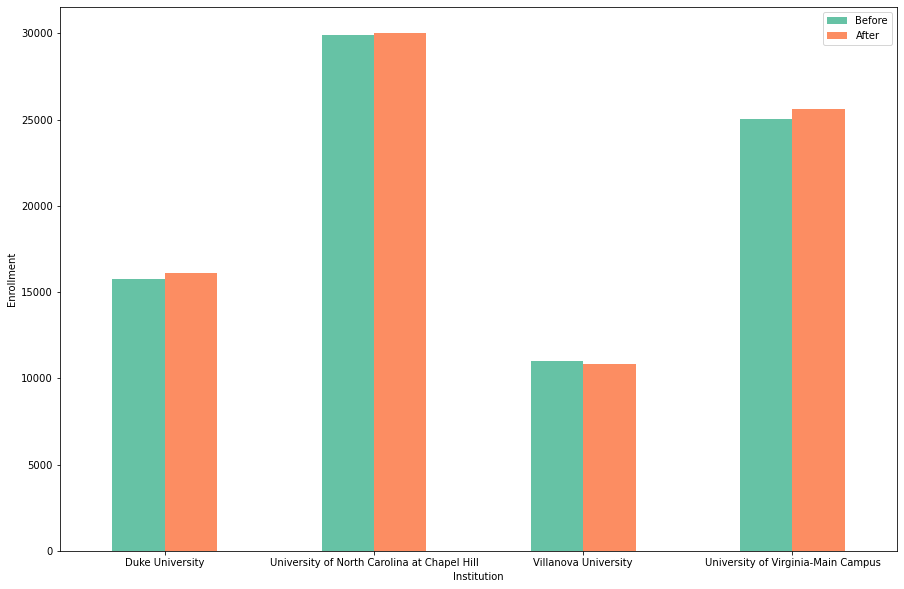

In [17]:
# Gather the enrollment the year before the team won the championship and the year after
duke = enrollment_table.query('Institution == "Duke University"')
duke = duke[['Institution', 'Fall_2017', 'Fall_2016']].reset_index().drop(columns = 'index')
duke['Fall_2017'] = duke['Fall_2017'].str.replace(',', '').astype(int)
duke['Fall_2016'] = duke['Fall_2016'].str.replace(',', '').astype(int)
duke = duke.rename(columns = {'Fall_2017': 'After', 'Fall_2016': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
unc = enrollment_table.query('Institution == "University of North Carolina at Chapel Hill"')
unc = unc[['Institution', 'Fall_2018', 'Fall_2017']].reset_index().drop(columns = 'index')
unc['Fall_2017'] = unc['Fall_2017'].str.replace(',', '').astype(int)
unc['Fall_2018'] = unc['Fall_2018'].str.replace(',', '').astype(int)
unc = unc.rename(columns = {'Fall_2018': 'After', 'Fall_2017': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
vill_2 = enrollment_table.query('Institution == "Villanova University"')
vill_2 = vill_2[['Institution', 'Fall_2019', 'Fall_2018']].reset_index().drop(columns = 'index')
vill_2['Fall_2018'] = vill_2['Fall_2018'].str.replace(',', '').astype(int)
vill_2['Fall_2019'] = vill_2['Fall_2019'].str.replace(',', '').astype(int)
vill_2 = vill_2.rename(columns = {'Fall_2019': 'After', 'Fall_2018': 'Before'})

# Gather the enrollment the year before the team won the championship and the year after
virginia = enrollment_table.query('Institution == "University of Virginia-Main Campus"')
virginia = virginia[['Institution', 'Fall_2020', 'Fall_2019']].reset_index().drop(columns = 'index')
virginia['Fall_2019'] = virginia['Fall_2019'].str.replace(',', '').astype(int)
virginia['Fall_2020'] = virginia['Fall_2020'].str.replace(',', '').astype(int)
virginia = virginia.rename(columns = {'Fall_2020': 'After', 'Fall_2019': 'Before'})

combine = pd.concat([duke, unc, vill_2, virginia], ignore_index=True)

#Split into two graphs for easier visualization 
df = pd.DataFrame({'Before': combine['Before'].tolist(),
                   'After': combine['After'].tolist()}, index=combine['Institution'])
ax = df.plot.bar(rot=0, ylabel="Enrollment", figsize=(15, 10))


In order to visualize the enrollent difference in a different manner I converted the above bar graphs to just display the difference in prospective students enrolling the year during the national championship and the year immediately following the national championship game. The only university to lose enrollment the year after winning the national championship was Villanova who won the championship two years prior which might have had an influence on prospective students. 

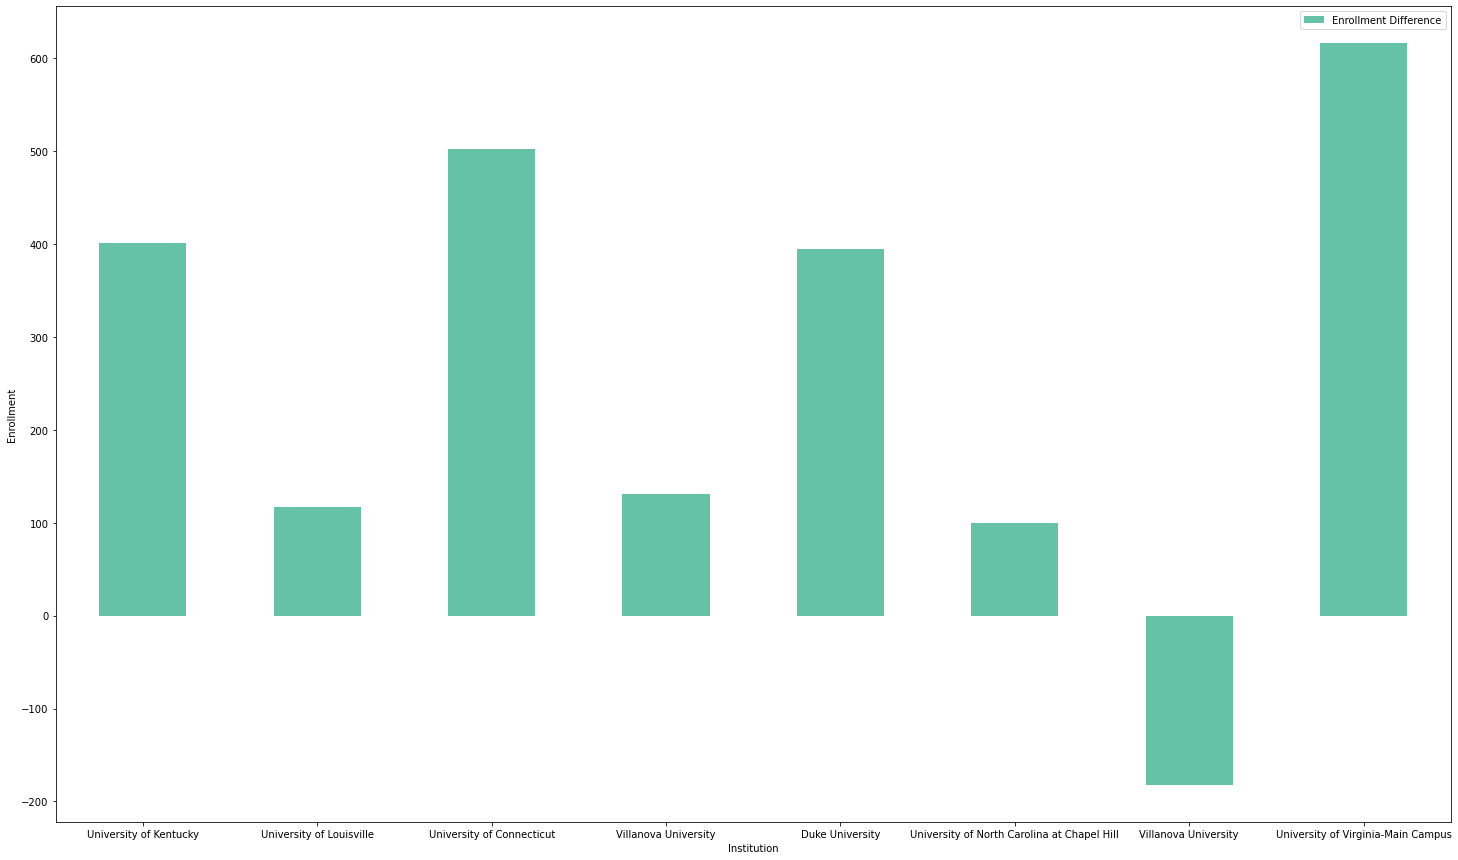

In [18]:
# Calculate the differnce in enrollment the year before and after for each team 
kent['Diff'] = kent['After'] - kent['Before']
louis['Diff'] = louis['After'] - louis['Before']
conn['Diff'] = conn['After'] - conn['Before']
vill_1['Diff'] = vill_1['After'] - vill_1['Before']
duke['Diff'] = duke['After'] - duke['Before']
unc['Diff'] = unc['After'] - unc['Before']
vill_2['Diff'] = vill_2['After'] - vill_2['Before']
virginia['Diff'] = virginia['After'] - virginia['Before']
combine = pd.concat([kent, louis, conn, vill_1, duke, unc, vill_2, virginia], ignore_index=True)

df = pd.DataFrame({'Enrollment Difference': combine['Diff'].tolist()}, index=combine['Institution'])
ax = df.plot.bar(rot=0, ylabel="Enrollment", figsize=(25, 15))

Instead of just looking into the enrollment numbers immediately after winning the national championship the graph below looks into the enrollment numbers the year during the national championship and 5 years after winning the national championship. This allows for more time to determine if there is any difference between a normal enrollment period and one that came about from winnning a national championship.

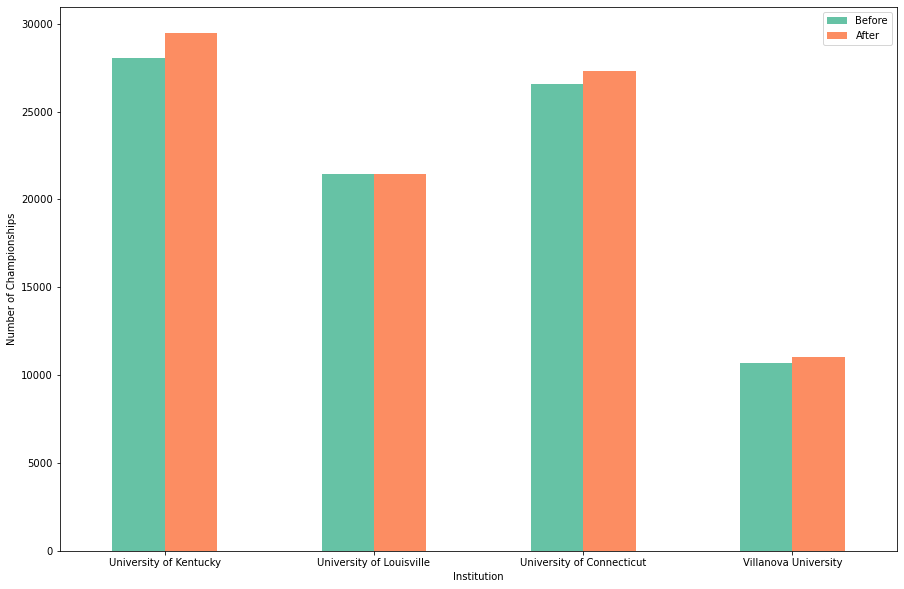

In [19]:
# Gather the enrollment the year before the team won the championship and 5 years after
kent = enrollment_table.query('Institution == "University of Kentucky"')
kent = kent[['Institution', 'Fall_2017', 'Fall_2012']].reset_index().drop(columns = 'index')
kent['Fall_2012'] = kent['Fall_2012'].str.replace(',', '').astype(int)
kent['Fall_2017'] = kent['Fall_2017'].str.replace(',', '').astype(int)
kent = kent.rename(columns = {'Fall_2017': 'After', 'Fall_2012': 'Before'})

# Gather the enrollment the year before the team won the championship and 5 years after
louis = enrollment_table.query('Institution == "University of Louisville"')
louis = louis[['Institution', 'Fall_2018', 'Fall_2013']].reset_index().drop(columns = 'index')
louis['Fall_2013'] = louis['Fall_2013'].str.replace(',', '').astype(int)
louis['Fall_2018'] = louis['Fall_2018'].str.replace(',', '').astype(int)
louis = louis.rename(columns = {'Fall_2018': 'After', 'Fall_2013': 'Before'})

# Gather the enrollment the year before the team won the championship and 5 years after
conn = enrollment_table.query('Institution == "University of Connecticut"')
conn = conn[['Institution', 'Fall_2019', 'Fall_2014']].reset_index().drop(columns = 'index')
conn['Fall_2014'] = conn['Fall_2014'].str.replace(',', '').astype(int)
conn['Fall_2019'] = conn['Fall_2019'].str.replace(',', '').astype(int)
conn = conn.rename(columns = {'Fall_2019': 'After', 'Fall_2014': 'Before'})

# Gather the enrollment the year before the team won the championship and 5 years after
vill_1 = enrollment_table.query('Institution == "Villanova University"')
vill_1 = vill_1[['Institution', 'Fall_2020', 'Fall_2015']].reset_index().drop(columns = 'index')
vill_1['Fall_2020'] = vill_1['Fall_2020'].str.replace(',', '').astype(int)
vill_1['Fall_2015'] = vill_1['Fall_2015'].str.replace(',', '').astype(int)
vill_1 = vill_1.rename(columns = {'Fall_2020': 'After', 'Fall_2015': 'Before'})

combine = pd.concat([kent, louis, conn, vill_1], ignore_index=True)

df = pd.DataFrame({'Before': combine['Before'].tolist(),
                   'After': combine['After'].tolist()}, index=combine['Institution'])
ax = df.plot.bar(rot=0, ylabel="Number of Championships", figsize=(15, 10))

<h1> 5. Insight and Conclusion </h1>

This final tutorial not only commented on the connection between the NCAA March Madness and Fall Enrollment, but also provided insight into the data lifecycle. These insights include:
<ul>
    <li>Transforming csv files from reputable sources into data frames for later processing </li>
    <li>Cleaning the data frames to remove uneccesaery values, change column names, and become acquanted with data values </li>
    <li>Creating data visualization charts to gain a better understadning of trends in the data</li>
    <li>Performing analysis on the visualization charts to make a conclusion backed by evidence</li>
</ul>

Throughout the entire process some additional insights include that the college basketball programs to win the national championship are located on the eastern half of the United States, the total score of the national championship game has increased, the score difference in the championship game has also increased, and that college enrollment has positively increased from the years 2011-2019 

Prospective students weigh a lot of options when considering applying and accepting enrollment offers from universities and besides academics, the next most important thing for some students involves the quality of sports program of their selected university. Students looking for a special experience at college often times rely on sports programs performing in the playoffs of the major sports which includes college basketball. The "cinderella" run from basketball teams in March Madness positively reflects on the college enrollment for the following Fall semester. This final tutorial is evidence for college admission departments to expect an influx of applicants the following years after winning a national championship! Lastly, our own Maryland Terrapins won the college basketball national championship in 2002!

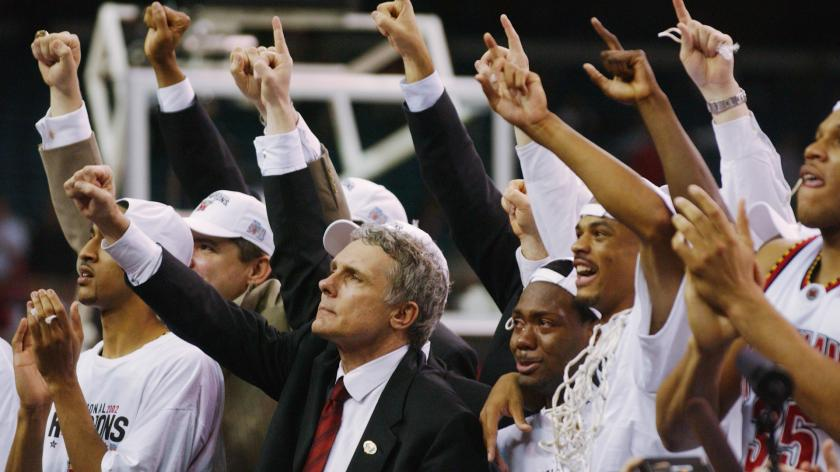